<a href="https://colab.research.google.com/github/jacobmrCuzzins/Machine-DeepLearning-/blob/main/Shallow_Network_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessing Data from Google Drive
The dataset for this assignment is the CIFAR-10 dataset that can be found here:
https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 and CIFAR-100 are well studied, yet challenging image recognition dataset. The CIFAR-10 has up to 10 classes to classify and contains 60,000 32x32 images. You should read the description of the dataset and download the dataset for Python, that is

CIFAR-10 python version: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Once downloaded you need to then extract and upload the `cifar-10-batches-py` directory your Google Drive so that you can access it from within your Google Colab.

You can mount the Google Drive from the menu on the left or uncomment use the code below mount the drive.  See here for documentation on file access in Colab:

[External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Functions to work with CIFAR

The functions below help with access to the CIFAR-10 data the you have downloaded.

In [ ]:
import pickle
import numpy as np
import pandas as pd

def load_CIFAR_batch(filename, flatten=True, categorical=True):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        if (flatten):
          X = X.reshape(10000, 3072)
        X = X.astype('float32')
        X /= 255

        y = datadict[b'labels']
        y = np.array(y)
        if (categorical):
          y = pd.get_dummies(y).values

        return X, y

def load_CIFAR_meta(filename):
  with open(filename,'rb') as f:
    metadict = pickle.load(f, encoding='bytes')

    class_labels = [ val.decode() for val in metadict.get(b'label_names') ]
    return class_labels

def get_image(X, index, nchans=3, size=32):
  xi = X[index,:]
  img = xi.reshape(32, 32, 3)
  return img

## Load the CIFAR data

The CIFAR data has 5 batches of data and 1 test data set. Each batch is labelled
- `data_batch_1`
- `data_batch_2`
- `data_batch_3`
- `data_batch_4`
- `data_batch_5`

and a test set labelled
- `test_batch`

each batch has 10,000 images, so 50,000 training and 10,000 test images.

Below is example of loading the first batch of training data labelled as `data_batch_1`.  You will need to update the path to match where you have stored your cifar-10 data.

In [ ]:
flatten = False
categorical = True

# load only the first batch
#X1, y1 = load_CIFAR_batch('/content/drive/My Drive/cifar-10-batches-py/data_batch_1',flatten=flatten,categorical=categorical)

# load only the second batch
#X2, y2 = load_CIFAR_batch('/content/drive/My Drive/COMP2712/data/cifar-10-batches-py/data_batch_2',flatten=flatten,categorical=categorical)

# Load the first batch from CIFAR-10
X, y = load_CIFAR_batch('/content/drive/My Drive/cifar-10-batches-py/data_batch_1',flatten=flatten,categorical=categorical)

# iterate over 2 to 5
#for bi in range(2,6):
  # load the next data set 'bi'
#  X2, y2 = load_CIFAR_batch('/content/drive/My Drive/cifar-10-batches-py/data_batch_{}'.format(bi),flatten=flatten,categorical=categorical)

  # concatenate/stack the dataest together
 # X = np.vstack([X, X2])
 # y = np.vstack([y, y2])


print('We have {} instances of images'.format(y.shape[0]))


We have 10000 instances of images


The number of instances/examples for all the different classes.  There are 10 different classes.

In [ ]:
[np.sum(np.argmax(y, axis=1) == i) for i in range(0,10)]

[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]

The labels for the classes are stored in the `batches.meta` file

In [ ]:
class_labels = load_CIFAR_meta('/content/drive/My Drive/cifar-10-batches-py/batches.meta')
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Let's look at some random cat images, because cats.

## Set up and train with a Single Hidden Layer

Let's start "easy" with a single hidden layer like an MLP but using the Tensor and Keras modules.

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Use `categorical_crossentropy` as the loss function (most common one for classfication problems):

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

def build_simple_model(number_of_features, number_hidden_nodes, number_of_output, activation='relu'):

    print('Number of input features: {}'.format(number_of_features))
    print('Number of hidden nodes: {}'.format(number_hidden_nodes))
    print('Activation Function on hidden layer: {}'.format(activation))
    print('Number of out classes: {}'.format(number_of_output))

    model = keras.Sequential()
    # a fully connected (dense) 'hidden' layer
    model.add(Dense(number_hidden_nodes, activation=activation, input_shape=[number_of_features]))
    # an output layer for classification
    model.add(Dense(number_of_output, activation=tf.nn.sigmoid))

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=keras.losses.categorical_crossentropy,
                  metrics=keras.metrics.categorical_crossentropy)
    return model

### Flatten the data
The data is currently a 3D image, but for the simple model we require a 1D feature vector.  So, we need to flatten the data.

In [ ]:
# we need to flatten the images for the simple model
n_samples = len(X)
X_flatten = X.reshape((n_samples, -1))

print('The number of samples: {}'.format(n_samples))
print('The old shape of the data: {}'.format(X.shape))
print('The new shape of the data: {}'.format(X_flatten.shape))
print('The shape of the y       : {}'.format(y.shape))

The number of samples: 10000
The old shape of the data: (10000, 32, 32, 3)
The new shape of the data: (10000, 3072)
The shape of the y       : (10000, 10)


### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
# sklearn evaluation packages
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

# use 5 epochs or iterations
no_epochs = 5
number_of_features = len(X_flatten[0])

# with 50 nodes in the single hidden layer
number_hidden_nodes = 50
number_of_output = len(y[0])

# relu is a good choice
activation = 'relu' # select from [None, 'sigmoid', 'tanh', 'relu']:
y_class = np.argmax(y, axis=1)

# build a sample model to see the summary
model = build_simple_model(number_of_features, number_hidden_nodes, number_of_output, activation=activation)
model.summary()


# Stratified K-Fold for evaluation of generalisation performance
k = 5 # 10 is the gold standard
kf = StratifiedKFold(n_splits=k)
foldi = 1
ac = [] # accuracy_score
cr = [] # classification_report
cm = [] # confusion_matrix
y_test_max_all = []
y_pred_max_all = []


for train_index, test_index in kf.split(X_flatten,y_class):
  X_train, X_test, y_train, y_test = X_flatten[train_index,:], X_flatten[test_index,:], y[train_index,:], y[test_index,:]

  model = build_simple_model(number_of_features, number_hidden_nodes, number_of_output, activation=activation)

  print('Training with {0} for {1} for fold {2} or {3}'.format(activation, no_epochs, foldi, k))
  history = model.fit(X_train, y_train, epochs=no_epochs, verbose=1)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch


  loss_final = np.sqrt(float(hist['loss'].tail(1)))
  print()
  print('Final Loss on training set: {}'.format(round(loss_final, 3)))

  # evaluate the model
  y_pred_real = model.predict(X_test)
  y_pred_max = np.argmax(y_pred_real, axis=-1).astype(int)
  y_test_max = y_test.argmax(axis=1).astype(int)

  y_pred_max_all.extend(y_pred_max)
  y_test_max_all.extend(y_test_max)

  ac.append(accuracy_score(y_test_max,y_pred_max))
  print('accuracy is {:.2f}%'.format(ac[-1]*100)) # Print accuracy score
  print()
  cr.append(classification_report(y_test_max,y_pred_max)) # Print summary report
  cm.append(confusion_matrix(y_test_max, y_pred_max))

  foldi = foldi + 1

print('k-fold complete!')

Number of input features: 3072
Number of hidden nodes: 50
Activation Function on hidden layer: relu
Number of out classes: 10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                153650    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 154160 (602.19 KB)
Trainable params: 154160 (602.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Number of input features: 3072
Number of hidden nodes: 50
Activation Function on hidden layer: relu
Number of out classes: 10
Training with relu for 5 for fold 1 or 5
Epoch 1/5
250/250 [==============================] - 10s 3ms/step - loss: 2.1833 - categorical_crossentropy: 2.1833
Epo

In [ ]:
print('Average Accuracy for {}-CV: {}% +/- {}% SD'.format(k, np.round(np.mean(ac)*100,2), np.round(np.std(ac)*100,2)))

Average Accuracy for 5-CV: 31.53% +/- 1.12% SD


In [ ]:
acc_all = accuracy_score(y_test_max_all,y_pred_max_all)*100
print('Accuracy: {:.2f}%'.format(acc_all))
print()
print(classification_report(y_test_max_all,y_pred_max_all))
print(confusion_matrix(y_test_max_all, y_pred_max_all))

mcc_all = matthews_corrcoef(y_test_max_all,y_pred_max_all)
print()
print('Matthews Correlation Coefficient: {}'.format(mcc_all))

Accuracy: 31.53%

              precision    recall  f1-score   support

           0       0.37      0.32      0.34      1005
           1       0.38      0.32      0.34       974
           2       0.22      0.14      0.17      1032
           3       0.25      0.19      0.21      1016
           4       0.28      0.20      0.23       999
           5       0.27      0.24      0.25       937
           6       0.29      0.50      0.36      1030
           7       0.37      0.24      0.29      1001
           8       0.34      0.54      0.42      1025
           9       0.36      0.46      0.40       981

    accuracy                           0.32     10000
   macro avg       0.31      0.31      0.30     10000
weighted avg       0.31      0.32      0.30     10000

[[320  50  61  32  15  20  33  40 355  79]
 [ 45 311  21  50  19  31  78  25 155 239]
 [ 99  45 142  52 169  69 251  66 110  29]
 [ 34  84  66 191  48 172 207  55  76  83]
 [ 70  28 113  52 201  80 285  82  45  43]
 [ 33  3

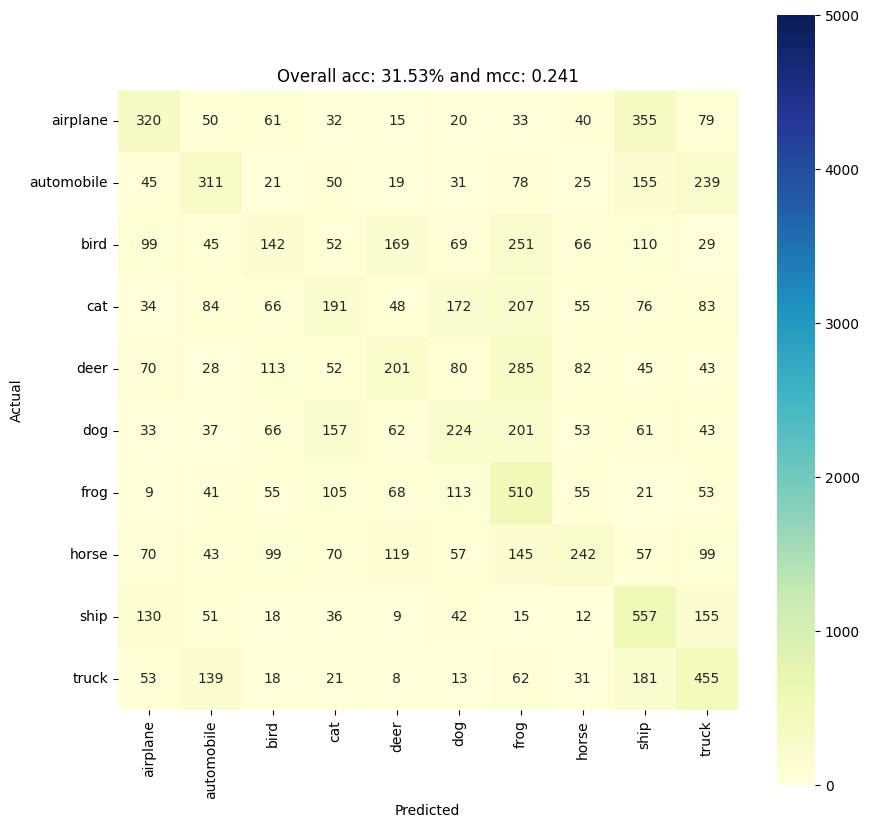

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

cm_all = np.sum(np.stack(cm,axis=2),axis=2)
df_cm = pd.DataFrame(cm_all, columns=class_labels, index=class_labels)
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(df_cm, annot=True, ax=ax1,square=True,  cmap="YlGnBu",vmin=0,vmax=5000,fmt='d')
ax1.set_title('Overall acc: {:.2f}% and mcc: {:.3f}'.format(acc_all,mcc_all))
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual');